coefficients from the highest degree to the lowest: [ 6.72517339e-06 -2.20480534e-05  1.75273765e-03  1.75599177e-05]
polynomial function from the coefficients:            3             2
6.725e-06 x - 2.205e-05 x + 0.001753 x + 1.756e-05


Text(1.0, 1.0, 'R^2: 0.9913433752209652')

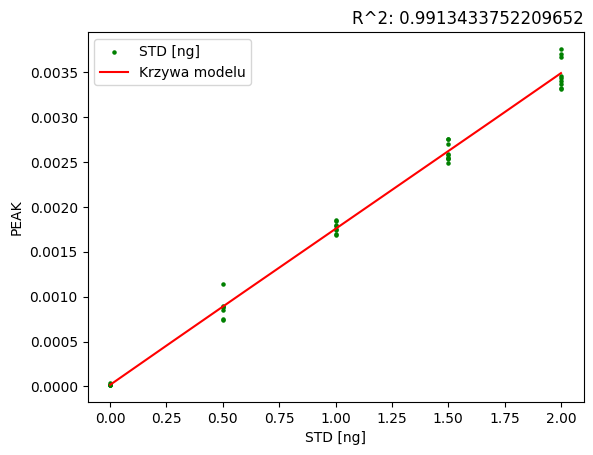

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

data = pd.read_csv(r'C:\Users\joasi\UKEN_Hg_Analysis\Data\Materials\example_cal_curve.csv')

# delete rows with empty data
clean_data = data.dropna()

# create x and y variables
x = clean_data['STD [ng]']
y = clean_data['PEAK']  # Zmienna zależna?

x_array = np.array(x)
y_array = np.array(y)

# max and min values of x for linspace
highest_value = x.max()
lowest_value = x.min()

# polifit returns the coefficients of the polynomial that fits the data
# it returns coefficients from the highest degree to the lowest
coeff = np.polyfit(x_array,y_array,3)
print("coefficients from the highest degree to the lowest:",coeff)

# poly1d creates a polynomial function from the coefficients
p_function = np.poly1d(coeff)
print("polynomial function from the coefficients:", p_function)

# xx is range of numbers so, we calculate polynomial function for each data point in the range
xx = np.linspace(lowest_value, highest_value, 10000) #
yy = p_function(xx)

r_squared = str(r2_score(y_array, p_function(x_array)))

# plot the data
plt.scatter(x_array, y_array, s=5, label="STD [ng]", c='green')
# plot the line
plt.plot(xx, yy, c='r', label="Krzywa modelu")

plt.legend()
plt.xlabel("STD [ng]")
plt.ylabel("PEAK")
plt.title("R^2: "+r_squared, loc='right')

